# College Admission Classification Labwork

Import Modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Using pandas, load "College Admission Train Data.csv"

In [3]:
df = pd.read_csv("../data/college-admission-test/College-Admission-Train-Data.csv", sep=',')
df.head()

,Exam1,Exam2,Decision
0,8.50,16.92,1
1,8.95,13.60,1
2,15.90,10.50,1
3,13.44,13.47,1
4,7.14,6.09,0


In [4]:
firstExam = df['Exam1']
secondExam = df['Exam2']

---

In this section, we will ignore the previous jury decision.


Plot the dataset using scores only :

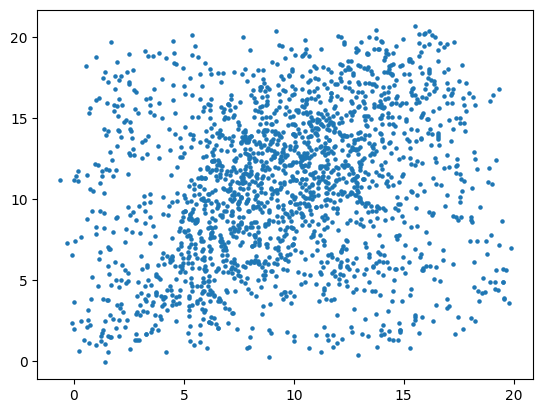

In [5]:
plt.scatter(firstExam, secondExam, s=5)

Compute the decision for each student (admitted if mean > 10) and store it in an array named decision:

In [6]:
mean_scores = df[['Exam1', 'Exam2']].mean(axis=1)
decision = (mean_scores > 10).map({True: 'admitted', False: 'rejected'}).to_numpy()

decision

array(['admitted', 'admitted', 'admitted', ..., 'rejected', 'admitted',
       'rejected'], dtype=object)

Plot the dataset using decision as color :

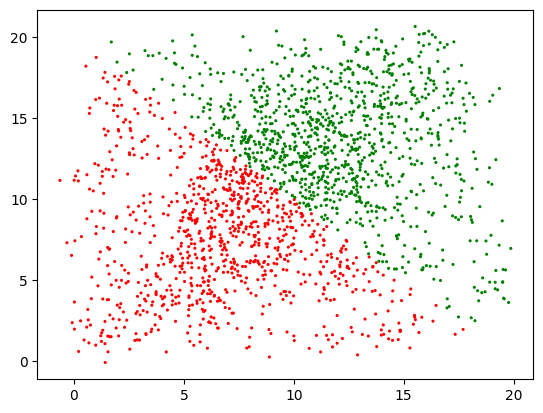

In [7]:
'''#scatter plot
for i in range(len(df)):
    if decision[i] == 'admitted':
        color = 'g'
    else:
        color = 'r'
    plt.scatter(firstExam.iloc[i],secondExam.iloc[i],c=color,s=5, linewidth=0)
'''
col = np.where(decision=='admitted','g', 'r')
plt.scatter(firstExam, secondExam, c=col, s=5, linewidths=0)


In [8]:
def plot_decision_boundary(input_data, decision, x_min=0, x_max=20, y_min=0, y_max=20, plot_step=0.05):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = (xx.ravel() + yy.ravel()) / 2 > 10
    Z = Z.reshape(xx.shape)
    cs = plt.pcolormesh(xx, yy, Z, cmap="Pastel1")
    plt.axis([x_min, x_max, y_min, y_max])
    plt.scatter(input_data['Exam1'], input_data['Exam2'], s=2, c=decision, cmap="prism")
    plt.show()

/tmp/ipykernel_7320/552529841.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(input_data['Exam1'], input_data['Exam2'], s=2, c=decision, cmap="prism")


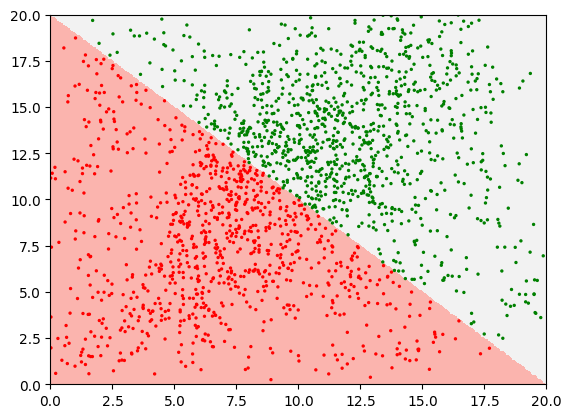

In [9]:
plot_decision_boundary(df, decision=col)

Plot the dicision boundaries and the data points (Apply class color from the dataset decision) :

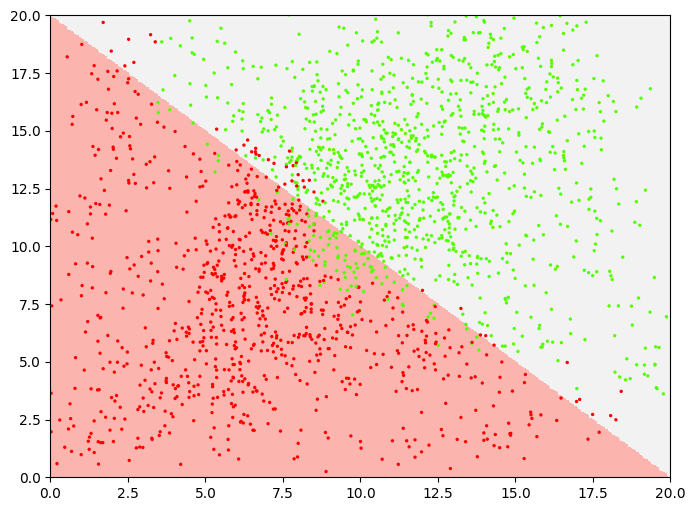

In [10]:
# Graphique des frontières de décision avec les points de données
# Les couleurs des points représentent la VRAIE décision du jury (pas l'algorithme)
plt.figure(figsize=(8, 6))
plot_decision_boundary(df, df['Decision'])  # Utiliser la vraie décision du jury pour la couleur


What is the algorithm decision accuracy related to the jury decision ??

In [11]:
# Calculer la précision de l'algorithme par rapport à la décision du jury
from sklearn.metrics import accuracy_score
algorithmic_accuracy = accuracy_score(df['Decision'], decision)
print(f"Précision de l'algorithme (moyenne > 10) par rapport à la décision du jury: {algorithmic_accuracy:.4f}")
print(f"Pourcentage de précision: {algorithmic_accuracy*100:.2f}%")

# Analyse détaillée
correct_predictions = sum(df['Decision'] == decision)
total_predictions = len(df)
print(f"\nPrédictions correctes: {correct_predictions}/{total_predictions}")

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=[0 1] and y_pred=['admitted' 'rejected']. Make sure that the predictions provided by the classifier coincides with the true labels.

# Linear Discriminant Analysis

Create and fit the model

Display the data and the decision boundaries 

In [ ]:
def plot_model_decision_boundary(model, input_data, x_min=0, x_max=20, y_min=0, y_max=20, plot_step=0.1):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.pcolormesh(xx, yy, Z, cmap="Pastel1")
    plt.axis([x_min, x_max, y_min, y_max])
    plt.scatter(input_data['Exam1'], input_data['Exam2'], s=2, c=input_data['Decision'], cmap="prism")
    plt.show()

Measure the accuracy of your model

# Quadratic Discriminant Analysis

---
# Decisision Tree Classifier

---

# Create a K-Nearest Neighbors Classifier (KNN)

# Random Forest

---

Load 'College Admission Test Data.csv'

Compute and print the accuracy of all models on test data